# Graphnet-Automata Model Revision, #3

## First we import the necessary libraries

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import community

import scipy.ndimage as nd

In [2]:
import warnings; warnings.simplefilter('ignore')

## A kernel has been introduced to facilitate the search for new graphs

In [3]:
KERNEL = np.array([[0, 1, 0],
                   [0, 1, 0],
                   [0, 0, 1]], dtype=np.uint8)

In [5]:
# convolution code courtesy of salt-die
class generator_state:
    seed = nx.to_numpy_matrix(nx.erdos_renyi_graph(13, 0.05, seed = 1, directed=True))
    
    def next_state(self):
        seed = self.seed
        seed = np.pad(seed, (1, 1), 'constant')
        neighbor_count = nd.convolve(seed, KERNEL, mode="constant")
        self.seed = np.where(((seed == 0) & (neighbor_count > 0) & (neighbor_count <= 4)) |
                                 ((seed == 1) & (neighbor_count > 4)), 1, 0)
        return(self.seed)
    
    def run(self):
        while True:
            for _ in range(500):
                self.next_state()
            return(self.seed)

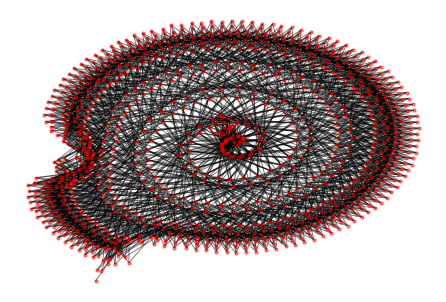

In [6]:
gen = generator_state()
gen_g1 = nx.from_numpy_matrix(gen.run())
nx.draw(gen_g1, node_size=10, alpha=0.5)
plt.savefig('g3_500.png')
plt.show()

## To quantify this graph structure, the distribution of the geodesic length is shown.

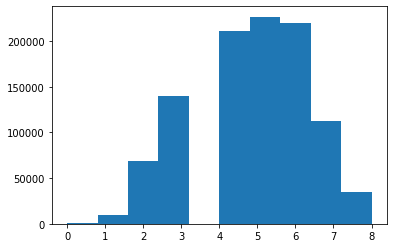

In [7]:
length_gen_g1 = dict(nx.all_pairs_shortest_path_length(gen_g1))
path_gen_g1 = dict(nx.all_pairs_shortest_path(gen_g1))
len_gen_g1 = []
for node1 in length_gen_g1:
    for node2 in length_gen_g1[node1]:
        len_gen_g1.append(length_gen_g1[node1][node2])
plt.hist(len_gen_g1)
plt.show()

## To further quantify this graph structure, the diameter of the graph is calculated.  Larger (>7) diameters tend to lead to more interesting graphs.

In [10]:
nx.algorithms.distance_measures.diameter(gen_g1)

8

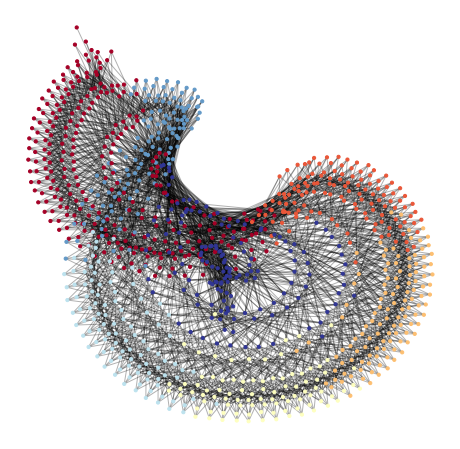

In [11]:
partition = community.best_partition(gen_g1)
pos = nx.spring_layout(gen_g1)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(gen_g1, pos, node_size=10, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(gen_g1, pos, alpha=0.3)
plt.savefig('g3_500_community.png')
plt.show(gen_g1)